<a href="https://colab.research.google.com/github/palisthadeshar/Tasks/blob/main/rectangle_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
def find_rectangles(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edges image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    rectangles = []

    # Iterate through the contours to find rectangles
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        #finding rectangles
        if len(approx) == 4:
            rectangles.append(approx)
    for rectangle in rectangles:

        # Determine the center of rotation
        rect = cv2.minAreaRect(rectangle)
        center = rect[0]

        # Create a 2D rotation matrix
        angle = 160
        scale = 1.0
        M = cv2.getRotationMatrix2D(center, angle, scale)

        # Apply the rotation matrix to the rectangle
        box = cv2.boxPoints(rect)
        box = cv2.transform(np.array([box]), M)[0]
        box = np.int0(box)

        # Draw the rotated rectangle on the image
        cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

    cv2_imshow(image)
    return rectangles

Saving rectangle.JPG to rectangle (8).JPG


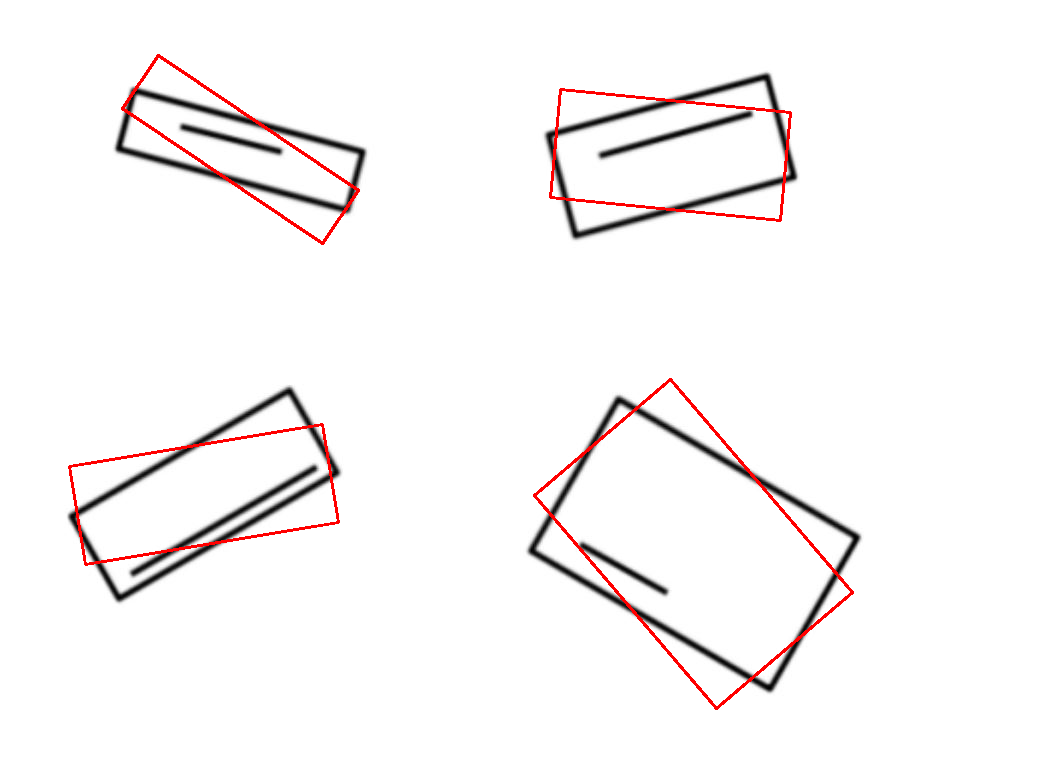

Number of rectangles found: 4


In [ ]:
if __name__ == '__main__':
    # Upload the image to Colab
    uploaded = files.upload()

    # Get the uploaded image file name
    image_filename = next(iter(uploaded))

    # Find all the rectangles in the image
    rectangles = find_rectangles(image_filename)
    print(f"Number of rectangles found: {len(rectangles)}")